In [1]:
from influxdb import InfluxDBClient
from datetime import datetime
import numpy as np
# from influxdb_client import InfluxDBClient
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import pandas as pd

In [2]:
client = InfluxDBClient(host='127.0.0.1', port=8086, username='kirilman', password='blue')

In [21]:
def get_history_ticker_from(client, ticker):
    ans = client.query("SELECT * FROM stocks WHERE ticker = '{}' and time > now() - {}d;".format(ticker, 21), 
                                          database='stocks')
    items = list(ans)[0]
    closes = np.array([c['close'] for c in items])
    dates = [datetime.strptime(c['time'],'%Y-%m-%dT%H:%M:%SZ')  for c in items]
    return closes, dates

In [22]:
closes, dates = get_history_ticker_from(client, 'DAL')

In [23]:
tickers=['SAVE','AAL','DAL','SPR','M','PBF','UAL','MAC','CCL','HAL','MAC','GPS']
# tickers=['SAVE','AAL','DAL','UAL','BA']

In [24]:
def get_frame(tickers, client):
    frame = pd.DataFrame()
    for ticker in tickers:
        try:
            closes, dates = get_history_ticker_from(client, ticker)
            series = pd.Series(data=closes, index=dates)
            frame[ticker] = series
        except Exception as ex:
            print(ex)
    return frame
frame = get_frame(tickers,client)

def normalize_values(frame, norm_day):
    for col in frame.columns:
        norm_day = frame[col].idxmax()
        print(norm_day)
        max_values = frame[col][norm_day]
        frame[col] = frame[col]/max_values
    return frame

In [25]:
start_day = frame['AAL'].idxmax()
frame = normalize_values(frame, start_day)

2020-06-08 07:15:00
2020-06-05 13:40:00
2020-06-05 13:05:00
2020-06-08 07:35:00
2020-06-08 20:45:00
2020-06-08 07:35:00
2020-06-05 07:30:00
2020-06-08 07:35:00
2020-06-08 22:05:00
2020-06-08 20:10:00
2020-06-09 07:20:00


In [26]:
def plot_procents_from_max(tickers):
    fig = plt.figure(figsize=(12,5), dpi = 180)
    ax = fig.gca()

    for i, ticker in enumerate(tickers):
        if i%2==0:
            plt.plot(frame[ticker],label=ticker,linestyle='dashed')
        elif i%3==0:
            plt.plot(frame[ticker],label=ticker,linestyle='dashdot')
        else:
            plt.plot(frame[ticker],label=ticker)

#         ax.set_xlim(datetime(year=2020,month=6,day=10, hour = 7))

    # ax.fmt_xdata = mdates.DateFormatter('%m-%d')
    ax.xaxis.set_minor_locator(mdates.HourLocator(range(0, 25, 1)))
    ax.set_ylabel('Процент от максимума')
    ax.set_ylim(0.58, 1.02)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("day %d"))
    # fig.autofmt_xdate()
    plt.legend()
    plt.savefig("/home/kirill/Рабочий стол/рынок.png")

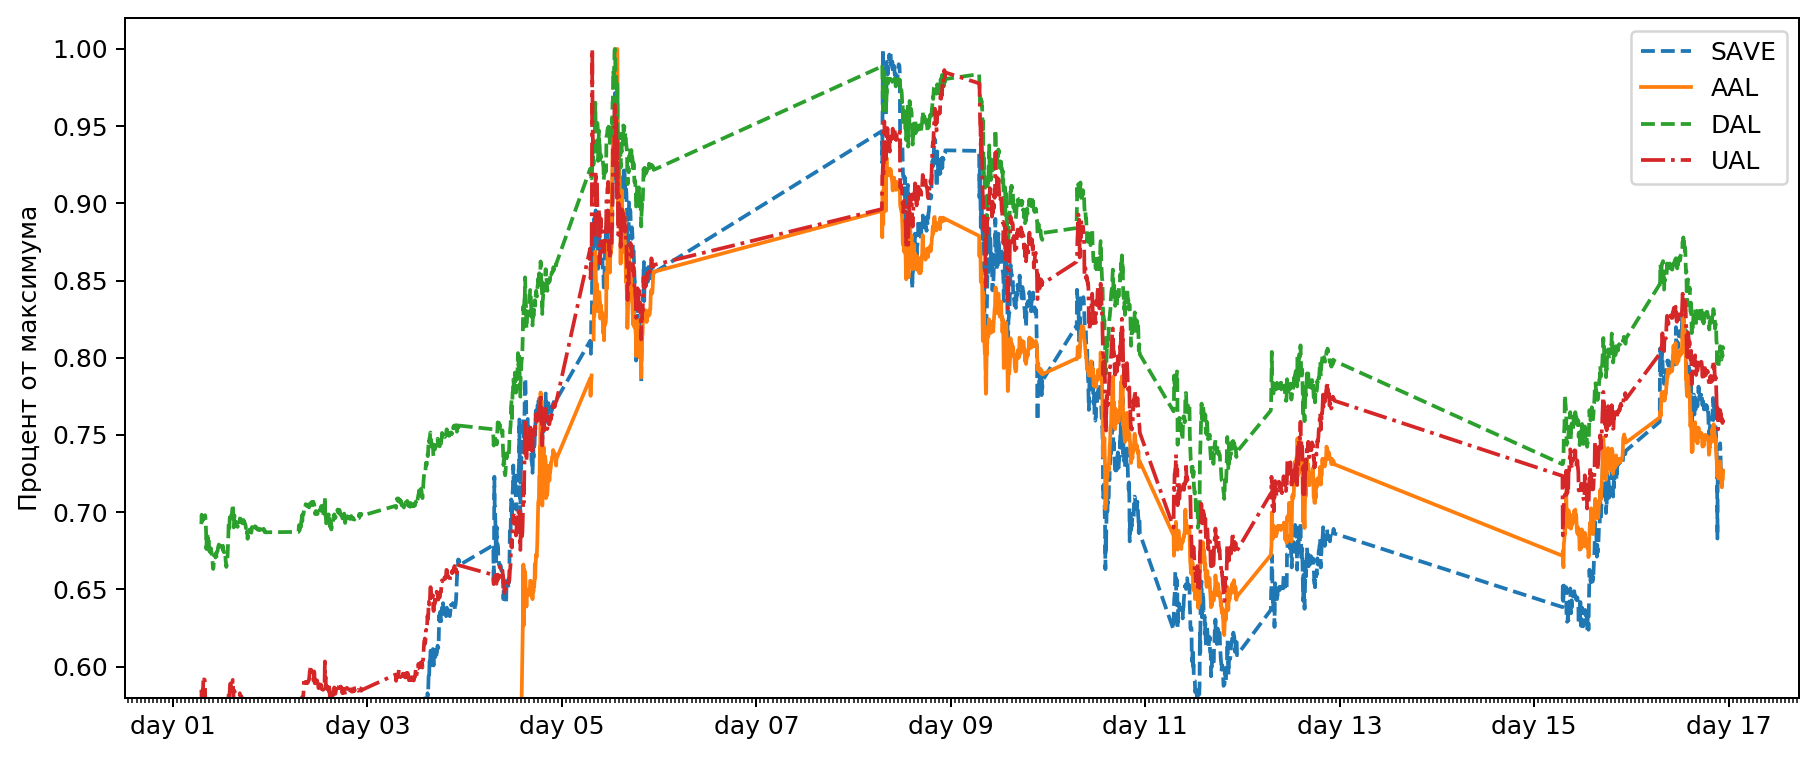

In [27]:
tickers=['SAVE','AAL','DAL','UAL']
plot_procents_from_max(tickers)

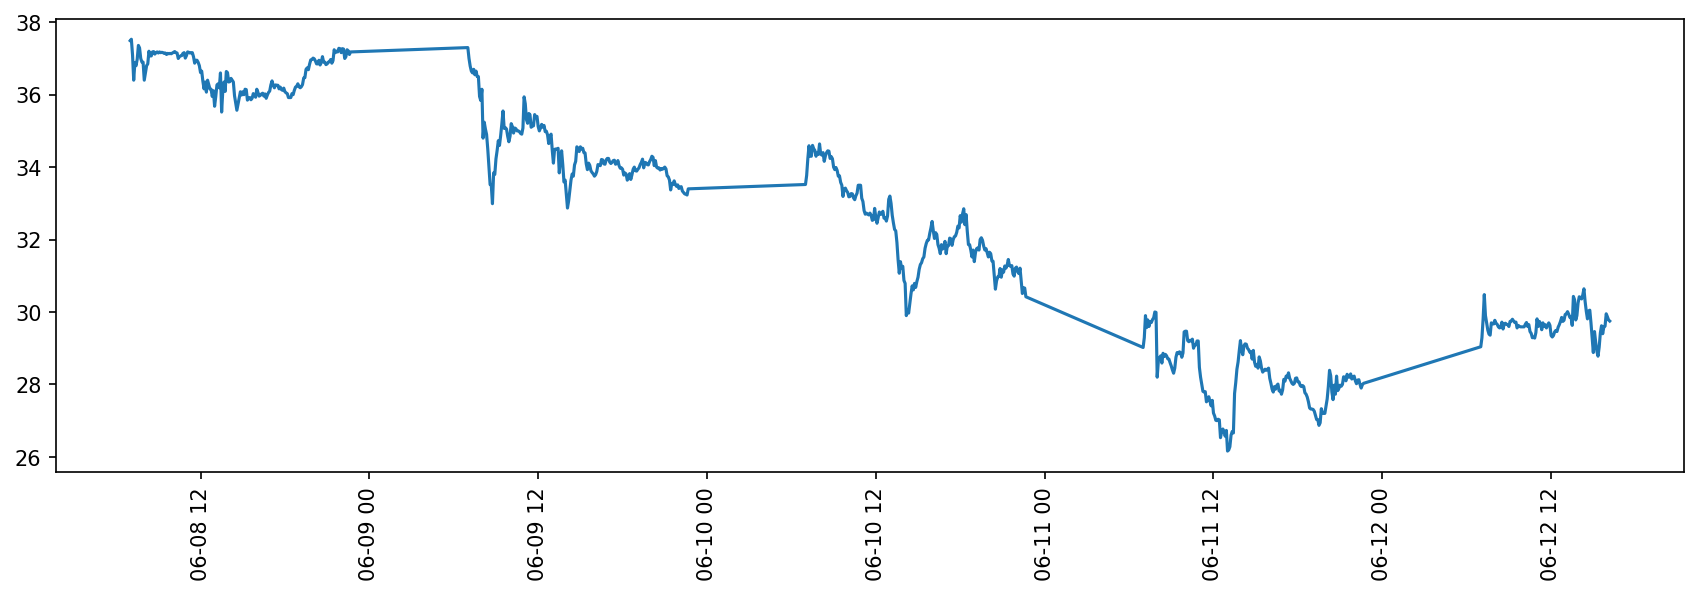

In [10]:
fig = plt.figure(figsize=(14,4), dpi = 150)
ax = fig.gca()
plt.plot(dates,closes)
# ax.set_xticks(dates)
# ax.xaxis.set_major_formatter(hfmt)
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%d"))
# plt.gcf().autofmt_xdate()
# ax.xaxis.set_minor_locator(mdates.HourLocator(range(0, 25, 25)))
# ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%dT%H:%M:%SZ')
# ax.xaxis.set_major_locator(mdates.HourLocator()

# ax.fmt_xdata = mdates.DateFormatter('%m-%d')
# fig.autofmt_xdate()

plt.xticks(rotation='vertical');

In [ ]:
{\displaystyle x=\cos(3t)\cos t,\quad y=\cos(3t)\sin t.\,}[7].

In [36]:
def clever(A,t):
    x = np.cos(A*t)*np.cos(t)
    y = np.cos(A*t)*np.sin(t)
    return x,y

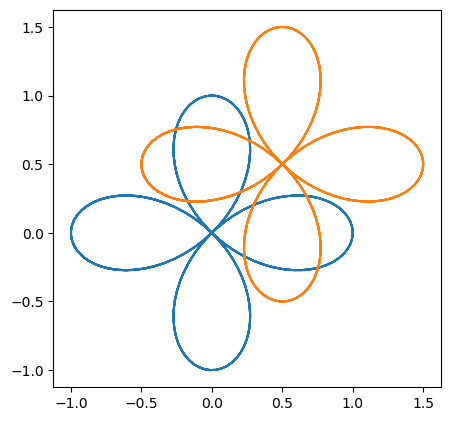

In [52]:
A = 2
range_t = np.linspace(-10,10,501)
x = np.array([clever(A,t)[0] for t in range_t])
y = np.array([clever(A,t)[1] for t in range_t])
fig = plt.figure(figsize=(5,5),dpi = 100)
plt.plot(x,y)
plt.plot(x+0.5,y+0.5)